In [ ]:
! pip install -q kaggle
!pip install split-folders

In [ ]:
from google.colab import drive
drive.mount("drive/")

Mounted at drive/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp "/content/drive/MyDrive/Kaggle API/kaggle.json" ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
# recupérer les données à partir de kaggle
! kaggle datasets download "tom99763/affectnethq"


100% 8.12G/8.12G [03:46<00:00, 48.3MB/s]
100% 8.12G/8.12G [03:46<00:00, 38.5MB/s]


In [ ]:
! unzip "/content/affectnethq.zip"

Streaming output truncated to the last 5000 lines.
  inflating: sad/image0027570.jpg    
  inflating: sad/image0027582.jpg    
  inflating: sad/image0027590.jpg    
  inflating: sad/image0027594.jpg    
  inflating: sad/image0027597.jpg    
  inflating: sad/image0027602.jpg    
  inflating: sad/image0027611.jpg    
  inflating: sad/image0027613.jpg    
  inflating: sad/image0027617.jpg    
  inflating: sad/image0027619.jpg    
  inflating: sad/image0027630.jpg    
  inflating: sad/image0027632.jpg    
  inflating: sad/image0027644.jpg    
  inflating: sad/image0027649.jpg    
  inflating: sad/image0027652.jpg    
  inflating: sad/image0027654.jpg    
  inflating: sad/image0027657.jpg    
  inflating: sad/image0027661.jpg    
  inflating: sad/image0027669.jpg    
  inflating: sad/image0027671.jpg    
  inflating: sad/image0027673.jpg    
  inflating: sad/image0027691.jpg    
  inflating: sad/image0027694.jpg    
  inflating: sad/image0027701.jpg    
  inflating: sad/image0027702.jpg    

In [ ]:
import os
import shutil
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torchvision.utils import make_grid
import matplotlib.pyplot as plt


In [ ]:
os.mkdir("data")

In [ ]:
! mv "/content/anger" "/content/data"
! mv "/content/disgust" "/content/data"
! mv "/content/contempt" "/content/data"
! mv "/content/fear" "/content/data"
! mv "/content/happy" "/content/data"
! mv "/content/sad" "/content/data"
! mv "/content/surprise" "/content/data"
! mv "/content/neutral" "/content/data"

In [ ]:
filenames = []
for root, dirname, filename in os.walk('/content/data'):
  filenames.append(filename)
filenames = [item for sublist in filenames for item in sublist]

In [ ]:
len(filenames)

31002

In [ ]:
number = 10
sample_train = int(number*0.8)
for i in range(sample_train):
  print(i)
print("#"*15)  
for j in range(sample_train, number):
  print(j)

0
1
2
3
4
5
6
7
###############
8
9


In [ ]:
#shutil.rmtree('/content/temp')
#len(filenames)*.8

In [ ]:
#@ DO NOT open not intresting

# import splitfolders # or import splitfolders
# os.chdir("/content")
# os.mkdir('/content/temp')
# input_folder = "./data"
# output = "./temp" 

# splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.85, .15)) 

In [ ]:
os.chdir("/content/data")
data_dir = os.getcwd()
os.mkdir('/content/temp')
os.chdir('/content/temp')
os.mkdir('train')
os.mkdir('validation')
os.chdir("/content/data")
# Split images (80%/10%/10%) and save to temporary folders:
for subfolder in os.listdir(data_dir):

    # Making a list of all files in current subfolder:
    original_path = f'{data_dir}/{subfolder}'
    original_data = os.listdir(original_path)
    print(original_path)
    # Number of samples in each group:
    n_samples = len(original_data)
    train_samples = int(n_samples * 0.8)
    valid_samples = int(n_samples * 0.9)
    print(train_samples)    
    train_path = f'/content/temp/train/{subfolder}'
    valid_path = f'/content/temp/validation/{subfolder}'
    #test_path = f'/content/temp/test/{subfolder}'
    
    # New class subfolder for training:
    os.chdir('/content/temp/train')
    os.mkdir(subfolder)
    
    # Training images:
    for image in range(train_samples):
        original_file = f'{original_path}/{original_data[image]}'
        new_file = f'{train_path}/{original_data[image]}'
        shutil.copyfile(original_file, new_file)
    
    # New class subfolder for validation:
    os.chdir('/content/temp/validation')
    os.mkdir(subfolder)
    
    # Validation images:
    for image in range(train_samples, n_samples):
      #print(image)
      original_file = f'{original_path}/{original_data[image]}'
      new_file = f'{valid_path}/{original_data[image]}'
      shutil.copyfile(original_file, new_file)

/content/data/surprise
3436
/content/data/anger
2910
/content/data/contempt
2543
/content/data/sad
2744
/content/data/disgust
2128
/content/data/fear
2897
/content/data/happy
4036
/content/data/neutral
4105


In [ ]:
os.chdir("/content")

In [ ]:
train_files = []

for _, _, files1 in os.walk("/content/temp/train/"):
  train_files.append(files1)

train_files = [item for sublist in train_files for item in sublist]

validation_files = []

for _, _, files2 in os.walk("/content/temp/validation/"):
  validation_files.append(files2)
validation_files = [item for sublist in validation_files for item in sublist]

print(f'Train_files {len(train_files)}')
print(f'Validation_files {len(validation_files)}')

Train_files 24799
Validation_files 6203


In [ ]:
train_files[1]

'image0034891.jpg'

In [ ]:
validation_files[1]

'image0027672.jpg'

In [ ]:
# Looking into the directory
data_dir = './temp'
print(os.listdir(data_dir))
classes_train = os.listdir(data_dir + "/train")
classes_valid = os.listdir(data_dir + "/validation")
train_images_nb = len(train_files)
valid_images_nb = len(validation_files)
print(f'Train images - {train_images_nb}')
print(f'Valid images - {train_images_nb}')
print("#### ------ ####")
print(f'Train Classes - {classes_train}')
print(f'Validation Classes - {classes_valid}')

['train', 'validation']
Train images - 24799
Valid images - 24799
#### ------ ####
Train Classes - ['surprise', 'anger', 'contempt', 'sad', 'disgust', 'fear', 'happy', 'neutral']
Validation Classes - ['surprise', 'anger', 'contempt', 'sad', 'disgust', 'fear', 'happy', 'neutral']


In [ ]:
# train_data = ImageFolder(root = data_dir + '/train', 
#                                   transform = tt.ToTensor())

# means = torch.zeros(3)
# stds = torch.zeros(3)

# for img, label in train_data:
#     means += torch.mean(img, dim = (1,2))
#     stds += torch.std(img, dim = (1,2))

# means /= len(train_data)
# stds /= len(train_data)
    
# print(f'Calculated means: {means}')
# print(f'Calculated stds: {stds}')

Calculated means: tensor([0.5341, 0.4345, 0.3872])

Calculated stds: tensor([0.2589, 0.2354, 0.2280])

In [ ]:
pretrained_means = [0.5341, 0.4345, 0.3872]
pretrained_stds= [0.2589, 0.2354, 0.2280]

In [ ]:
# Data transforms (Gray Scaling & data augmentation)
train_tfms = tt.Compose([
                         tt.Resize((150, 150)),
                         tt.RandomHorizontalFlip(p=0.5),
                         tt.RandomRotation(25),
                         tt.ToTensor(),
                         tt.Normalize(mean = pretrained_means, 
                                                std = pretrained_stds)])

valid_tfms = tt.Compose([tt.Resize((150, 150)), tt.ToTensor()])

In [ ]:
train_ds = ImageFolder(data_dir + '/train', train_tfms)
valid_ds = ImageFolder(data_dir + '/validation', valid_tfms)

In [ ]:
train_ds[0][0].shape

torch.Size([3, 150, 150])

In [ ]:
batch_size = 64

In [ ]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size, num_workers=2, pin_memory=True)

In [ ]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        print(images[0].shape)
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 150, 150])


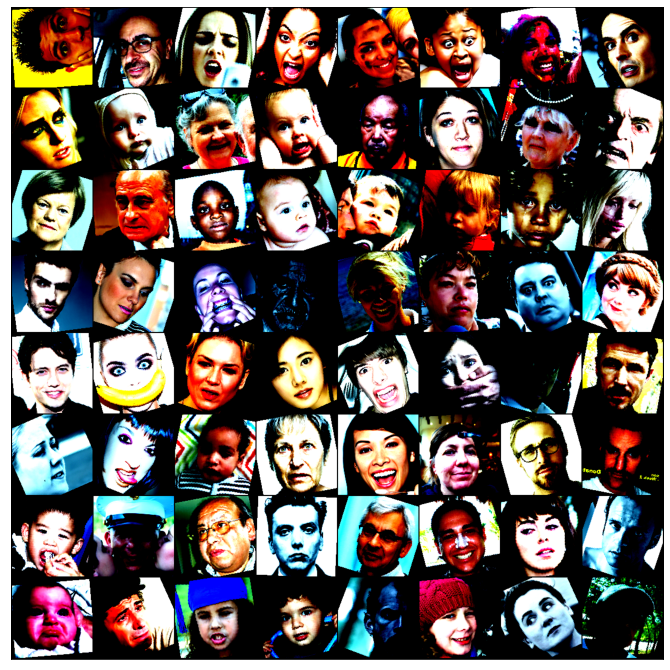

In [ ]:
show_batch(train_dl)

In [ ]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ELU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2,2,0))
    return nn.Sequential(*layers)

class ResNet(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 128) # [3,128,128]
        self.conv2 = conv_block(128, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        self.drop1 = nn.Dropout(0.5)
        
        self.conv3 = conv_block(128, 256)
        self.conv4 = conv_block(256, 256, pool=True)
        self.res2 = nn.Sequential(conv_block(256, 256), conv_block(256, 256))
        self.drop2 = nn.Dropout(0.5)
        
        self.conv5 = conv_block(256, 512)
        self.conv6 = conv_block(512, 512, pool=True)
        self.res3 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        self.drop3 = nn.Dropout(0.3)
        
        self.classifier = nn.Sequential(nn.MaxPool2d(6), 
                                        nn.Flatten(),
                                        nn.Linear(4608, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.drop1(out)
        
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.drop2(out)
        
        out = self.conv5(out)
        out = self.conv6(out)
        out = self.res3(out) + out
        out = self.drop3(out)
        
        out = self.classifier(out)
        return out

In [ ]:
! rm "/content/affectnethq.zip"

In [ ]:
shutil.rmtree("./data")

In [ ]:
#ResNet(3, len(classes_train)).eval()

In [ ]:
model = to_device(ResNet(3, len(classes_train)), device)
model

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0, inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0, inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ELU(alpha=1.0, inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [ ]:
for param in model.parameters():
    print(param.shape)

torch.Size([128, 3, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([256, 128, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([512, 256, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up custom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
history = [evaluate(model, valid_dl)]
history

RuntimeError: ignored

In [ ]:
epochs = 25
max_lr = 1e-4
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                        grad_clip=grad_clip, weight_decay=weight_decay, opt_func=opt_func)

# Plotting Performance Graphs of the Model

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');


In [ ]:
plot_lrs(history)

In [ ]:
import os
from google.colab import drive
drive.mount("drive/")

In [ ]:
!ls "/content/drive/MyDrive/HETIC PFA"

In [ ]:
!mkdir models

In [ ]:
#torch.save(model.state_dict(), './models/emotion_detection_model_state.pth')

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/HETIC PFA/Models/emotion_detection_model_state_enhanced.pth')